# 2. Importing Library

In [1]:
# First we will import the necessary Library 


import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pickle

# 3. Loading Dataset

In [4]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('btc (1).csv')

In [5]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  3118
Total number of fields present in the dataset:  7


In [6]:
maindf.shape

(3118, 7)

In [7]:
maindf.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [8]:
maindf.tail()

Date          Open          High           Low         Close  \
3113  2023-03-27  27994.068359  28037.925781  26606.689453  27139.888672   
3114  2023-03-28  27132.888672  27460.718750  26677.818359  27268.130859   
3115  2023-03-29  27267.031250  28619.542969  27259.662109  28348.441406   
3116  2023-03-30  28350.140625  29159.902344  27720.160156  28033.562500   
3117  2023-03-31  28064.269531  28322.953125  27615.091797  27771.408203   

         Adj Close       Volume  
3113  27139.888672  18188895178  
3114  27268.130859  17783600385  
3115  28348.441406  20684945906  
3116  28033.562500  22435349951  
3117  27771.408203  19818526720

In [9]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3118 non-null   object 
 1   Open       3118 non-null   float64
 2   High       3118 non-null   float64
 3   Low        3118 non-null   float64
 4   Close      3118 non-null   float64
 5   Adj Close  3118 non-null   float64
 6   Volume     3118 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 170.6+ KB


In [10]:
maindf.describe()

Open          High           Low         Close     Adj Close  \
count   3118.000000   3118.000000   3118.000000   3118.000000   3118.000000   
mean   13143.796078  13473.037959  12781.453873  13151.023881  13151.023881   
std    16049.109291  16458.775196  15578.878754  16046.173073  16046.173073   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      710.843765    721.055985    701.600235    712.334015    712.334015   
50%     7339.815430   7498.520019   7184.514160   7344.389892   7344.389892   
75%    18861.100586  19281.327149  18321.396973  18885.488770  18885.488770   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  3.118000e+03  
mean   1.660943e+10  
std    1.980862e+10  
min    5.914570e+06  
25%    1.112058e+08  
50%    8.914254e+09  
75%    2.814039e+10  
max    3.509679e+11

# Checking for Null Values

In [11]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [12]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [13]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(3118, 7)

In [14]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2023-03-30')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

Date          Open          High           Low         Close
0    2014-09-17    465.864014    468.174011    452.421997    457.334015
1    2014-09-18    456.859985    456.859985    413.104004    424.440002
2    2014-09-19    424.102997    427.834991    384.532013    394.795990
3    2014-09-20    394.673004    423.295990    389.882996    408.903992
4    2014-09-21    408.084991    412.425995    393.181000    398.821014
...         ...           ...           ...           ...           ...
3112 2023-03-26  27495.523438  28178.144531  27445.046875  27994.330078
3113 2023-03-27  27994.068359  28037.925781  26606.689453  27139.888672
3114 2023-03-28  27132.888672  27460.718750  26677.818359  27268.130859
3115 2023-03-29  27267.031250  28619.542969  27259.662109  28348.441406
3116 2023-03-30  28350.140625  29159.902344  27720.160156  28033.562500

[3117 rows x 5 columns]

In [15]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open         Close
Date                                 
January    13653.879059  13653.079616
February   14841.738755  14909.331519
March      15874.954219  15930.996111
April      15132.974493  15119.381881
May        13314.612240  13220.946305
June       11234.810040  11180.578800
July       10802.818819  10856.268967
August     12707.833563  12722.796312
September  11591.568901  11565.811349
October    12243.190767  12331.016560
November   13116.708674  13100.038704
December   12900.597655  12898.391135

In [16]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [17]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3118, 2)


In [18]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 5 Year

In [19]:
closedf = closedf[closedf['Date'] > '2021-11-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  515


In [20]:
closedf

Date         Close
2603 2021-11-02  63226.402344
2604 2021-11-03  62970.046875
2605 2021-11-04  61452.230469
2606 2021-11-05  61125.675781
2607 2021-11-06  61527.480469
...         ...           ...
3113 2023-03-27  27139.888672
3114 2023-03-28  27268.130859
3115 2023-03-29  28348.441406
3116 2023-03-30  28033.562500
3117 2023-03-31  27771.408203

[515 rows x 2 columns]

In [21]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [22]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(515, 1)


* ### Slicing data into Training set and Testing set

In [23]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (309, 1)
test_data:  (206, 1)


In [24]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (293, 15)
y_train:  (293,)
X_test:  (190, 15)
y_test (190,)


In [26]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (293, 15, 1)
X_test:  (190, 15, 1)


* # Actuall Model Building

In [27]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [28]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
10/10 [==============================] - 2s 46ms/step - loss: 0.1871 - val_loss: 0.0060
Epoch 2/200
10/10 [==============================] - 0s 9ms/step - loss: 0.1225 - val_loss: 0.0027
Epoch 3/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0719 - val_loss: 0.0023
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0366 - val_loss: 0.0039
Epoch 5/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0163 - val_loss: 0.0065
Epoch 6/200
10/10 [==============================] - 0s 9ms/step - loss: 0.0076 - val_loss: 0.0084
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0047 - val_loss: 0.0078
Epoch 8/200
10/10 [==============================] - 0s 6ms/step - loss: 0.0040 - val_loss: 0.0057
Epoch 9/200
10/10 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 10/200
10/10 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 11

- ### Plotting Loss vs Validation loss 

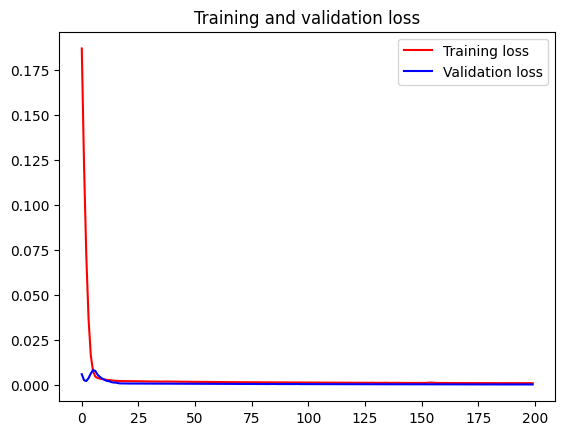

<Figure size 640x480 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 0s 2ms/step


((293, 1), (190, 1))

- # Model Evaluation

In [31]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [32]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  1655.0658812949077
Train data MSE:  2739243.07142649
Train data MAE:  1230.0634532009387
-------------------------------------------------------------------------------------
Test data RMSE:  954.2701729349966
Test data MSE:  910631.5629533882
Test data MAE:  680.4232730335525


- ## Variance Regression Score

In [33]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9775191531892415
Test data explained variance regression score: 0.9172208548237589


- ## R square score for regression

In [34]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9775157285087259
Test data R2 score: 0.9167462590977498


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [35]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0023043550583000507
Test data MGD:  0.0021142743318434435
----------------------------------------------------------------------
Train data MPD:  76.20841560496484
Test data MPD:  43.430152890605754


In [36]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (515, 1)
Test predicted data:  (515, 1)


- # Predicting next 30 days

In [37]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 7
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  7


- # Plotting last 15 days of dataset and next predicted 30 days

In [38]:
print(lst_output[2])
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[0.2204761803150177]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22]


In [39]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
fbitfile= open("link.txt", "wb")
pickle.dump((next_predicted_days_value),fbitfile)
fbitfile.close()


- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [40]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()